In [11]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

In [6]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
train_X.shape

(60000, 28, 28)

In [10]:
train_y[0]

5

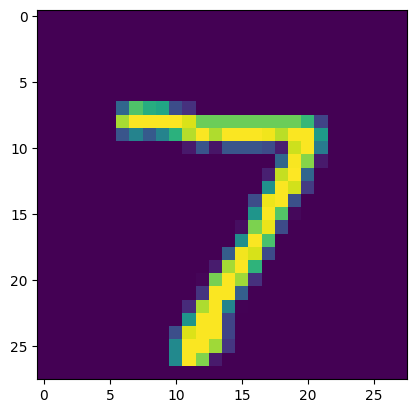

In [38]:
plt.imshow(test_X[0,...])

In [33]:
test_y.shape

(10000,)

In [34]:
y_sparse_train = np.zeros([60000,10])
y_sparse_test = np.zeros([10000,10])

In [35]:
for idx in range(60000):
    y_sparse_train[idx,train_y[idx]] = 1

for idx in range(10000):
    y_sparse_test[idx,test_y[idx]] = 1

In [36]:
y_sparse_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [37]:
y_sparse_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [42]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

In [88]:
model =  Sequential()

In [89]:
model.add(Flatten(input_shape=(28,28)))

In [90]:
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [91]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(loss = "categorical_crossentropy", optimizer=SGD(learning_rate=0.0001),metrics=["accuracy"])

In [93]:
history = model.fit(x= train_X, y = y_sparse_train, validation_data=(test_X, y_sparse_test), batch_size = 128, epochs=20)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 12.3832 - accuracy: 0.7304 - val_loss: 5.0621 - val_accuracy: 0.8382
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 4.2731 - accuracy: 0.8462 - val_loss: 3.4213 - val_accuracy: 0.8649
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 3.0881 - accuracy: 0.8669 - val_loss: 2.7404 - val_accuracy: 0.8785
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 2.4604 - accuracy: 0.8799 - val_loss: 2.3353 - val_accuracy: 0.8871
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 2.0729 - accuracy: 0.8882 - val_loss: 2.0511 - val_accuracy: 0.8927
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7982 - accuracy: 0.8952 - val_loss: 1.8739 - val_accuracy: 0.8965
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 1.5947 - accuracy: 0.8988 - val_loss: 1.7006 - val_accuracy: 0.9004
Epoch

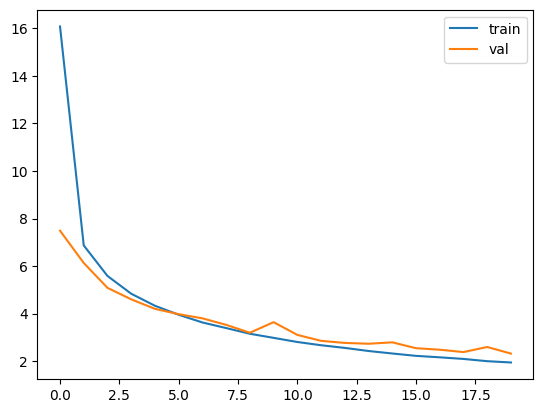

In [86]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.legend()
plt.show()

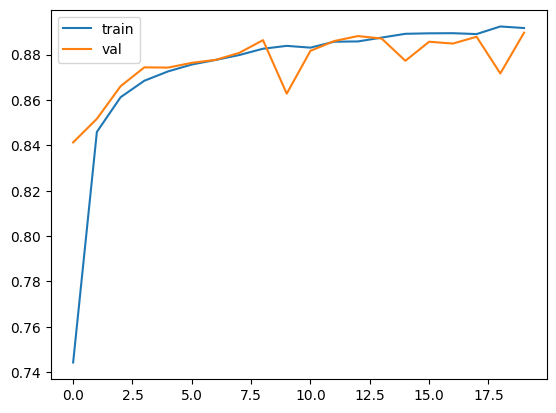

In [87]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.legend()
plt.show()